In [ ]:
import pandas as pd
import numpy as np

file_name = "fall381"

with open("/content/drive/MyDrive/Project/task2/base_data/{}.txt".format(file_name), "rt") as f: 
    data = f.readlines()

    # print(data)

    # 레이더 1~4 값만 추출하기
    radar_li = []

    for i in range(len(data)):
        radar = data[i].strip().split(',')
        radar = radar[2:6] 

        # for j in range(4):
        #     radar_li.append(float(radar[i][j]))
        radar_li.append(radar)
        for j in range(4):
            radar_li[i][j] = float(radar_li[i][j])
    print(radar_li)
    # radar_arr = np.array(radar_li)
    # print(radar_arr)
    

In [ ]:
col = ['Radar_1', 'Radar_2', 'Radar_3', 'Radar_4']
df_data = pd.DataFrame(data = radar_li, columns = col)
df_data

In [ ]:
df_data.replace(0, np.nan, inplace = True)
df_data2 = df_data.copy()
df_data2.dropna(axis = 0, how = 'all', inplace = True)
df_data2.reset_index(inplace=True)
df_data2

In [ ]:
df_data3 = df_data2.copy()
df_data3.dropna(axis = 0, thresh = 3, inplace = True) # 값이 1개만 있는 데이터 삭제(전부 2개 이상 남음.)
df_data3.reset_index(drop = True, inplace = True)
df_data3

In [ ]:
# interpolate 함수를 써서 보간하기. 
df_data4 = df_data3.copy()
df_data4.interpolate(limit_direction= 'both', method = 'linear', inplace = True)

In [ ]:
df_data3.plot(y = col)
df_data4.plot(y = col) # 보간후 데이터값
df_data4

In [ ]:
# 보간 후 원의 반지름 추출하기

df_data4_arr = np.array(df_data4)
df_data4_radar1 = df_data4_arr[:,1]
df_data4_radar2 = df_data4_arr[:,2]
df_data4_radar3 = df_data4_arr[:,3]
df_data4_radar4 = df_data4_arr[:,4]
# print(df_data4_radar1[0])
# print(df_data4_radar1)
# print()
# print(df_data4_radar2)

In [ ]:
# matplotlib을 이용해서 레이더 범위 시각화하기

from matplotlib import pyplot as plt     
import matplotlib.patches as patches          
import time


pause_time = 0.001

li = []

# 가로: 3.15m, 세로: 4.95m/ 각각의 레이더 좌표(원의 중심점) 입력
circle_center1 = (3.15, 0)
circle_center2 = (3.15, 4.95)
circle_center3 = (0, 0)
circle_center4 = (0, 4.95)

# 보간했던 레이더값 입력 -> 원의 반지름
for i in range(len(df_data4_arr)):
    circle_radius1 = df_data4_radar1[i] 
    circle_radius2 = df_data4_radar2[i]
    circle_radius3 = df_data4_radar3[i]
    circle_radius4 = df_data4_radar4[i]

# print(circle_radius1)
    
    # 격자그리기
    a = plt.axes(xlim=(-5, 10), ylim=(-5, 10))

    
    # 사각형(방) 그리기
    a.add_patch(patches.Rectangle((0,0), 3.15, 4.95, edgecolor = 'blue', fill = False, linewidth = 2))

    # 원 그리기
    c1 = plt.Circle(circle_center1, circle_radius1, ec = 'r', fill = False, lw = 2)
    c2 = plt.Circle(circle_center2, circle_radius2, ec = 'y', fill = False, lw = 2)
    c3 = plt.Circle(circle_center3, circle_radius3, ec = 'g', fill = False, lw = 2)
    c4 = plt.Circle(circle_center4, circle_radius4, ec = 'purple', fill = False, lw = 2)

    # 격자에 원 추가하기
    a.add_patch(c1)
    a.add_patch(c2)
    a.add_patch(c3)
    a.add_patch(c4)
    a.set_aspect('equal')


    # print("data_{}/{}: ".format(i+1, len(df_data4_arr)),df_data4_arr[i,1:5])

    plt.rcParams["figure.figsize"] = (6, 8)

    plt.title("{}: data_{}/{}".format(file_name, i+1, len(df_data4_arr)), fontsize = 20)

    plt.text(3.4, -0.6, 'Radar1: {}'.format(circle_radius1), fontsize = 15)
    plt.text(3.4, 5.25, 'Radar2: {}'.format(circle_radius2), fontsize = 15)
    plt.text(-4.2, -0.6, 'Radar3: {}'.format(circle_radius3), fontsize = 15)
    plt.text(-4.2, 5.25, 'Radar4: {}'.format(circle_radius4), fontsize = 15)

    plt.grid(True)
    plt.show()
    print()
    time.sleep(pause_time)

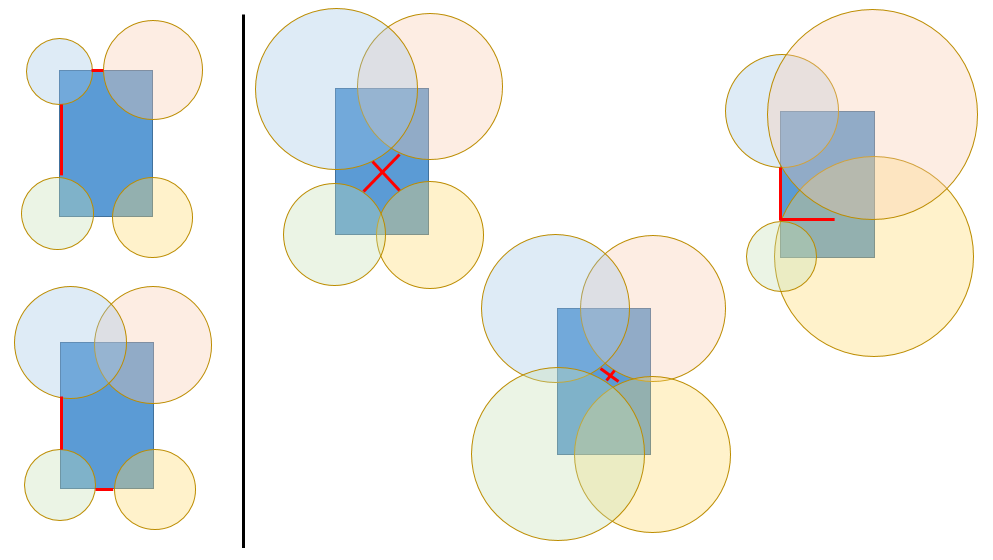

In [ ]:
# 객체면적 구하기 ver.2 

import math
# 가로: 3.15m, 세로: 4.95m/ 각각의 레이더 좌표(원의 중심점) 입력
circle_center1 = (3.15, 0)
circle_center2 = (3.15, 4.95)
circle_center3 = (0, 0)
circle_center4 = (0, 4.95)

# 방의 길이
w = 3.15
h = 4.95
diagonal_line = math.sqrt(pow(w, 2) + pow(h, 2))


# 가로길이
def width_length(radar1, radar2, radar3, radar4):
    if radar1 + radar3 < 3.2 and radar2 + radar4 < 3.2:
        return min(w - abs(radar1 + radar3), w - abs(radar2 + radar4))
    elif radar1 + radar3 < 3.2 and radar2 + radar4 >= w:
        return w - abs(radar1 + radar3)
    elif radar1 + radar3 >= w and radar2 + radar4 < 3.2:
        return w - abs(radar2 + radar4)
    elif (radar1 + radar3 >= w and radar2 + radar4 >= w) and (radar1 + radar4 < diagonal_line and radar2 + radar3 < diagonal_line):
        return diagonal_line - (radar2 + radar3)
    else:
        return 0


# 세로길이
def high_length(radar1, radar2, radar3, radar4):
    if radar1 + radar2 < 4.6 and radar3 + radar4 < 4.6:
        return min(h - abs(radar1 + radar2),h - abs(radar3 + radar4))
    elif radar1 + radar2 < 4.6 and radar3 + radar4 >= h:
        return h - abs(radar1 + radar2)
    elif radar1 + radar2 >= h and radar3 + radar4 < 4.6:
        return h - abs(radar3 + radar4)
    elif (radar1 + radar3 >= w and radar2 + radar4 >= w) and (radar1 + radar4 < diagonal_line and radar2 + radar3 < diagonal_line):
        return diagonal_line - (radar1 + radar4) 
    else:
        return 0


# 객체면적
def target_section(radar1, radar2, radar3, radar4, width_length, high_length):
    
    if (radar1 > w and radar2 > w) and (math.sqrt(radar1**2 - w**2) + math.sqrt(radar2**2 - w**2)) > 4.6:
        return 0
    elif (radar3 > w and radar4 > w) and (math.sqrt(radar3**2 - w**2) + math.sqrt(radar4**2 - w**2)) > 4.6:
        return 0
    elif radar1 >= diagonal_line or radar2 >= diagonal_line or radar3 >= diagonal_line or radar4 >= diagonal_line:
        return 0
    elif (radar1 > w and radar2 > w) and (math.sqrt(radar1**2 - w**2) >= radar3 or math.sqrt(radar2**2 - w**2) >= radar4) and (math.sqrt(radar1**2 - w**2) + math.sqrt(radar2**2 - w**2)) < h:
        return (h - (max(math.sqrt(radar1**2 - w**2), radar3) + max(math.sqrt(radar2**2 - w**2), radar4))) * (h - (max(math.sqrt(radar1**2 - w**2), radar3) + max(math.sqrt(radar2**2 - w**2), radar4))) / 4
    elif (radar3 > w and radar4 > w) and (math.sqrt(radar3**2 - w**2) >= radar1 or math.sqrt(radar4**2 - w**2) >= radar2) and (math.sqrt(radar3**2 - w**2) + math.sqrt(radar4**2 - w**2)) < h:
        return (h - (max(math.sqrt(radar3**2 - w**2), radar1) + max(math.sqrt(radar4**2 - w**2), radar1))) * (h - (max(math.sqrt(radar3**2 - w**2), radar1) + max(math.sqrt(radar4**2 - w**2), radar1))) / 4
    else:
        return width_length * high_length



In [ ]:
target_li = []
for i in range(len(df_data4_arr)):
    circle_radius1 = df_data4_radar1[i] 
    circle_radius2 = df_data4_radar2[i]
    circle_radius3 = df_data4_radar3[i]
    circle_radius4 = df_data4_radar4[i]

    width_len = width_length(circle_radius1, circle_radius2, circle_radius3, circle_radius4)
    high_len = high_length(circle_radius1, circle_radius2, circle_radius3, circle_radius4)

    Final_target_section = target_section(circle_radius1, circle_radius2, circle_radius3, circle_radius4, width_len, high_len)

    target_li.append(Final_target_section)

    print(file_name + "의 {}번째 레이더길이 : ".format(i+1), df_data4_arr[i, 1:5])
    print(file_name + "의 {}번째 가로길이는 : ".format(i+1), width_len)
    print(file_name + "의 {}번째 세로길이는 : ".format(i+1), high_len)
    print(file_name + "의 {}번째 객체면적은 : ".format(i+1), Final_target_section)
    print()

In [ ]:
print(target_li)

In [ ]:
df_data4['Target_section'] = target_li

In [ ]:
df_data4

In [ ]:
# 면적의 차

Section_Difference = [0] 


for i in range(1,len(df_data4)):
    diff = df_data4.iloc[i, 5] - df_data4.iloc[i-1, 5]

    Section_Difference.append(diff)


print(Section_Difference)


# df_data4_arr2 = np.array(df_data4)  같은방식

# for i in range(1,len(df_data4_arr2)):
#     diff =  df_data4_arr2[:, 5][i] - df_data4_arr2[:,5][i-1]

#     Section_Difference.append(diff)



In [ ]:
df_data4['Section_Diff'] = Section_Difference

In [ ]:
df_data4

추가) 가속도

In [ ]:
speed_li = []
speed_li2 = []

# 속도 불러오기

for i in range(len(data)):
    speed = data[i].strip().split(',')
    speed = speed[6:10] 

    speed_li.append(speed)

# 보간했던 값의 속도만 뽑아주기

for j in df_data4.iloc[:, 0]:
    speed2 = speed_li[j]
    speed_li2.append(speed2)

    speed_arr = np.array(speed_li2)
    speed_arr = speed_arr.astype('float')

print(speed_arr)

In [ ]:
# 방법 2

# # 가속도 구하기


# # 속도 불러오기

# speed_li = []

# for i in range(len(data)):
#     speed = data[i].strip().split(',')
#     speed = speed[6:10] 

#     speed_li.append(speed)

#     speed_arr = np.array(speed_li)
#     speed_arr = speed_arr.astype('float')

# # print(speed_arr)

# # 보간했던 값의 속도만 뽑아주기

# speed_li2 = []

# for j in df_data4.iloc[:, 0]:
#     speed_arr2 = speed_arr[j]
#     speed_li2.append(speed_arr2)

# print(speed_li2)


In [ ]:
# 시간의 변화

# timestemp불러오기

time_li = []
time_li2 = []

for i in range(len(data)):
    time = data[i].strip().split(',')
    time = time[1] 

    time_li.append(time)

# 보간했던 값의 timestemp만 뽑아주기

for j in df_data4.iloc[:, 0]:
    time2 = time_li[j]
    time_li2.append(time2)

    time_arr = np.array(time_li2)
    time_arr = time_arr.astype('float')

print(time_arr)

In [ ]:
# 방법 2

# # 시간의 변화 

# # 1초는 1000mm/s 총 50개의 프레임.
# # 즉, 1타임스탬프 = 0.02mm/s

# # timestemp불러오기

# time_li = []

# for i in range(len(data)):
#     time = data[i].strip().split(',')
#     time = np.array(time[1])

#     time_li.append(time)

#     time_arr = np.array(time_li)
#     time_arr = time_arr.astype('float')

# # 보간했던 값의 timestemp만 뽑아주기

# time_li2 = []

# for j in df_data4.iloc[:, 0]:
#     time_arr2 = time_arr[j]
#     time_li2.append(time_arr2)

# print(time_li2)

In [ ]:
# timestemp 시간으로 변환하기

# 1초는 1000mm/s 총 50개의 프레임.
# 즉, 1타임스탬프 = 0.02mm/s

time_li = [0]
for i in range(1, len(time_arr)):
    time_difference = time_arr[i] - time_arr[i-1]

    time_li.append(time_difference * 0.02)

print(time_li)


In [ ]:
df_data4['Time_diff'] = time_li

In [ ]:
# 속도 변화

speed_dff = [np.array([0, 0, 0, 0])]
for i in range(1, len(speed_arr)):
    speed_difference = speed_arr[i] - speed_arr[i-1]

    speed_dff.append(speed_difference)

print(speed_dff)



In [ ]:
# 가속도 = 속도변화 / 시간변화

Acceleration = [np.array([0, 0, 0, 0])]
for i in range(1, len(speed_dff)):
    acc = speed_dff[i] / time_li[i]
    Acceleration.append(acc)

print(Acceleration)

In [ ]:
col2 = ['Accleration_1', 'Accleration_2', 'Accleration_3', 'Accleration_4']
df_accleration = pd.DataFrame(data = Acceleration, columns = col2)
df_accleration

In [ ]:
col3 = ['Speed_Diff_1', 'Speed_Diff_2', 'Speed_Diff_3', 'Speed_Diff_4']
df_speed_diff = pd.DataFrame(data = speed_dff, columns = col3)
df_speed_diff

In [ ]:
df_data5 = pd.concat([df_data4, df_speed_diff,df_accleration], axis = 1)
df_data5.rename(columns={"index": "Original_index"}, inplace = True)
df_data5


In [ ]:
df_data5.to_csv(path_or_buf = "/content/drive/MyDrive/Project/task4/{}.csv".format(file_name), encoding = 'utf-8')